In [1]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import schist as scs
import pandas as pd
import scipy.stats
import sklearn.metrics
import scipy.spatial
import scipy.cluster

%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = scs.io.read('paul15')

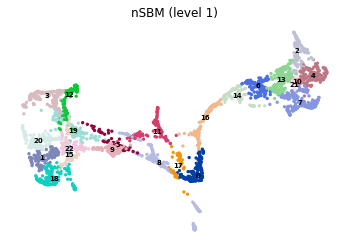

In [3]:
sc.pl.draw_graph(adata, color="nsbm_level_1", frameon=False, 
                legend_loc='on data', legend_fontsize='x-small', 
                title='nSBM (level 1)')

In [8]:
pd.crosstab(adata.obs['nsbm_level_0'], adata.obs['nsbm_level_1'])['8'] > 0

nsbm_level_0
20     31
35     29
103    28
23     20
83     19
51     13
10     12
98     11
110     9
80      0
79      0
78      0
74      0
77      0
81      0
76      0
75      0
82      0
0       0
73      0
Name: 8, dtype: int64

In [4]:
g8 = list(adata.obs['nsbm_level_0'].cat.categories[pd.crosstab(adata.obs['nsbm_level_0'], adata.obs['nsbm_level_1'])['8'] > 0])
g17 = list(adata.obs['nsbm_level_0'].cat.categories[pd.crosstab(adata.obs['nsbm_level_0'], adata.obs['nsbm_level_1'])['17'] > 0])

In [16]:
adata.uns['nsbm_level_0_colors'] = ['gray'] * len(adata.obs['nsbm_level_0'].cat.categories)

In [17]:
adata.uns['nsbm_level_0_colors'][103] = 'blue'
adata.uns['nsbm_level_0_colors'][35] = 'orange'
adata.uns['nsbm_level_0_colors'][38] = 'green'

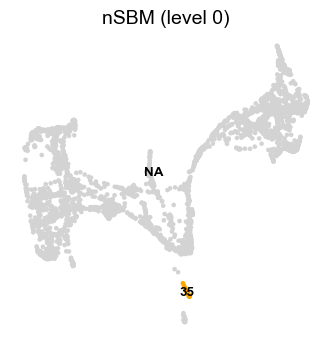

In [18]:
sc.pl.embedding(adata, color="nsbm_level_0", frameon=False, basis='X_draw_graph_fa',
                legend_loc='on data', legend_fontsize='x-small', 
                title='nSBM (level 0)', groups=['35'])

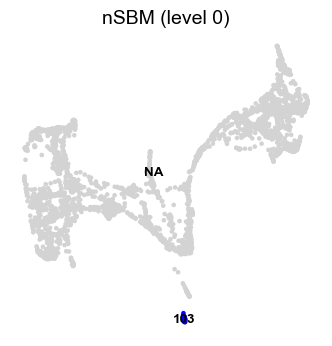

In [19]:
sc.pl.embedding(adata, color="nsbm_level_0", frameon=False, basis='X_draw_graph_fa',
                legend_loc='on data', legend_fontsize='x-small', 
                title='nSBM (level 0)', groups=['103'])

In [20]:
sc.set_figure_params(dpi_save=300, dpi=100)

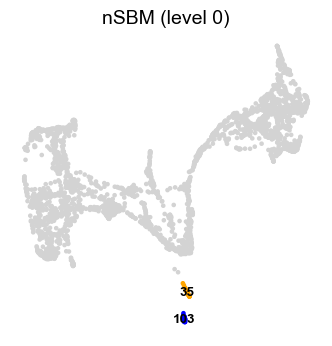

In [22]:
#adata.uns['nsbm_level_0_colors'] = ['grey'] * len(adata.obs['nsbm_level_0'].cat.categories)
sc.pl.embedding(adata, color="nsbm_level_0", frameon=False, basis='X_draw_graph_fa',
                legend_loc='on data', legend_fontsize='x-small', 
                title='nSBM (level 0)', groups=['103', '35', ], na_in_legend=False)

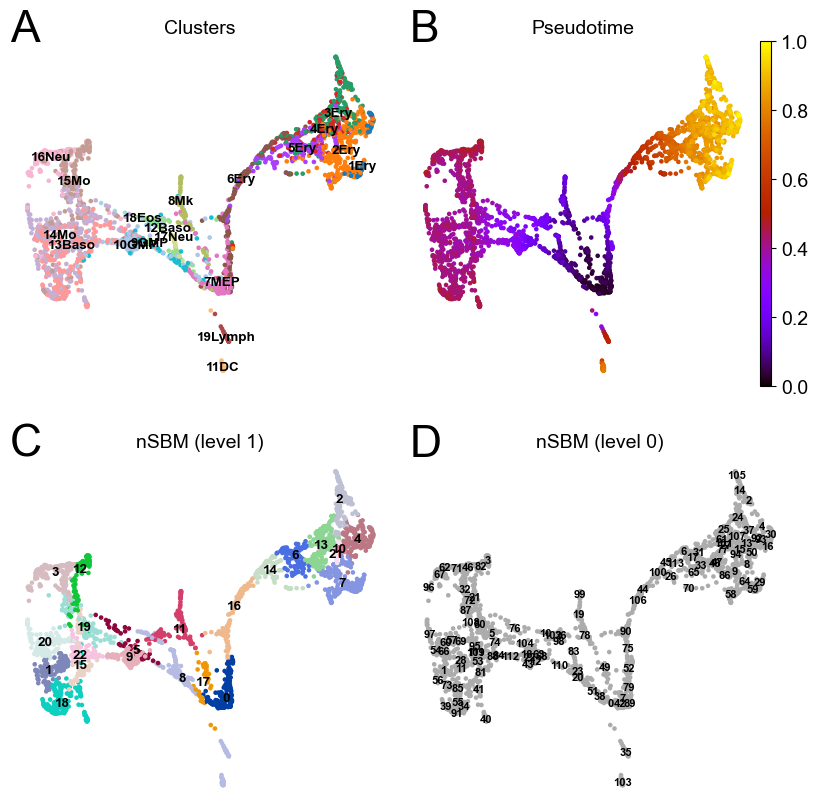

In [67]:
adata.uns['nsbm_level_0_colors'] = ['#ACACAC'] * 114
fig = plt.figure(constrained_layout=False, figsize=(10, 10))
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.05)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

sc.pl.embedding(adata, color="paul15_clusters", frameon=False, basis='X_draw_graph_fa',
                legend_loc='on data', legend_fontsize='x-small', 
                title='Clusters',
                na_in_legend=False, show=False, ax=ax1)
ax1.text(0, 1, 'A', size=32, transform=ax1.transAxes)

sc.pl.embedding(adata, color="dpt_pseudotime", frameon=False, basis='X_draw_graph_fa',
                legend_loc='on data', legend_fontsize='x-small', 
                title='Pseudotime', color_map='gnuplot',
                na_in_legend=False, show=False, ax=ax2)
ax2.text(0, 1, 'B', size=32, transform=ax2.transAxes)




sc.pl.embedding(adata, color="nsbm_level_1", frameon=False, basis='X_draw_graph_fa',
                legend_loc='on data', legend_fontsize='x-small', 
                title='nSBM (level 1)',
                na_in_legend=False, show=False, ax=ax3)
ax3.text(0, 1, 'C', size=32, transform=ax3.transAxes)


sc.pl.embedding(adata, color="nsbm_level_0", frameon=False, basis='X_draw_graph_fa',
                legend_loc='on data', legend_fontsize='xx-small', 
                title='nSBM (level 0)', 
                na_in_legend=False, show=False, ax=ax4)
ax4.text(0, 1, 'D', size=32, transform=ax4.transAxes)
plt.show()
fig.savefig("Figure_Hemato_Supp.pdf", dpi=300, transparent=True)

In [45]:
114/6

19.0

In [65]:

#adata.uns['nsbm_level_0_colors'] = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'] * 19
adata.uns['nsbm_level_0_colors'] = ['#ACACAC'] * 114
#adata.uns['nsbm_level_0_colors'][103] = 'blue'
#adata.uns['nsbm_level_0_colors'][35] = 'orange'
#adata.uns['nsbm_level_0_colors'][38] = 'green'
#adata.uns['nsbm_level_0_colors'][51] = 'pink'

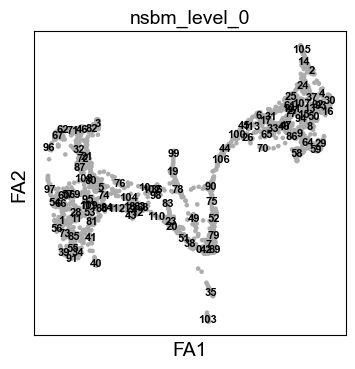

In [66]:
sc.pl.draw_graph(adata, color='nsbm_level_0', legend_loc='on data', 
                legend_fontsize='xx-small')

In [34]:
adata.obs

,paul15_clusters,n_genes,dpt_pseudotime,leiden_r_1.0,leiden_r_0.9,leiden_r_0.8,leiden_r_0.7,leiden_r_0.6,leiden_r_0.5,leiden_r_0.4,...,nsbm_level_3,nsbm_level_4,nsbm_level_5,nsbm_level_6,nsbm_level_7,nsbm_level_8,nsbm_level_9,nsbm_level_10,nsbm_level_11,nsbm_level_12
0,7MEP,277,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15Mo,1021,0.406800,1,1,25,19,1,16,1,...,1,0,0,0,0,0,0,0,0,0
2,3Ery,1466,0.905350,2,2,2,2,2,2,2,...,2,1,0,0,0,0,0,0,0,0
3,15Mo,1415,0.457629,3,3,26,24,3,3,3,...,1,0,0,0,0,0,0,0,0,0
4,3Ery,1505,0.920168,4,4,4,10,4,4,4,...,2,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2Ery,1401,0.794940,15,14,7,6,7,6,6,...,2,1,0,0,0,0,0,0,0,0
2726,13Baso,1209,0.426127,20,19,17,1,15,13,13,...,1,0,0,0,0,0,0,0,0,0
2727,7MEP,322,0.031866,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2728,15Mo,1196,0.435338,3,3,26,24,3,3,3,...,1,0,0,0,0,0,0,0,0,0
